# PyTorch CNN implementation for handwritten digit recognition MNIST

**Author:** Miguel Robledo Kusz

**Description:** This project is mainly for learning purposes. It starts with a basic implementation of a CNN in PyTorch to recognize handwritten digits from the MNIST dataset. Later, I plan to extend it by testing the model on digits written by myself, creating a small custom dataset. This way, I can evaluate the model’s performance in different scenarios.

**Use of LLMs for assistance:** I acknowledge the major role that LLMs play today in development, both for generating code and improving documentation. I will use them as a support tool in this project, for commands, PyTorch syntax, and general guidance, but always applying critical thinking and making sure I understand what I’m doing. The ultimate goal is to learn to carry out these tasks independently in the future. *Miguel Robledo Kusz, October 3rd, 2025, 00:41.*

## Importing libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Download dataset and apply transformation

In [10]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

img, label = train_dataset[0]
print(img.shape, img.min(), img.max())

torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)


### PIL Image

In [11]:
train_dataset_for_testing = datasets.MNIST(root="./data", train=True, download=True, transform=None)

pil_img, label = train_dataset_for_testing[0]

print("Size of the train dataset: ", len(train_dataset_for_testing))

print("Type of image: ", type(pil_img))
print("Mode of PIL Image: ", pil_img.mode)
print("Size of PIL image", pil_img.size)

# convert PIL image to numpy array
import numpy as np

img_array = np.array(pil_img)
print("Label of the training example: ", label)
print("Numpy array of the image:\n", img_array)

Size of the train dataset:  60000
Type of image:  <class 'PIL.Image.Image'>
Mode of PIL Image:  L
Size of PIL image (28, 28)
Label of the training example:  5
Numpy array of the image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0 

### My transformation

In [12]:
class MyCompose:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, x):
        for t in self.transforms:
            x = t(x)
        return x

class ToTensor:
    def __call__(self, x):
        np_array = np.array(x, dtype=np.float32) / 255.0
        return torch.from_numpy(np_array).unsqueeze(0)
    
class Normalize:
    def __init__(self, mean=0.5, std=0.5):
        self.mean = mean
        self.std = std
    
    def __call__(self, x):
        return (x - self.mean) / self.std
    
my_transform = MyCompose([ToTensor(), Normalize()])
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

img, label = train_dataset[0]
print(img.shape, img.min(), img.max())


torch.Size([1, 28, 28]) tensor(-1.) tensor(1.)


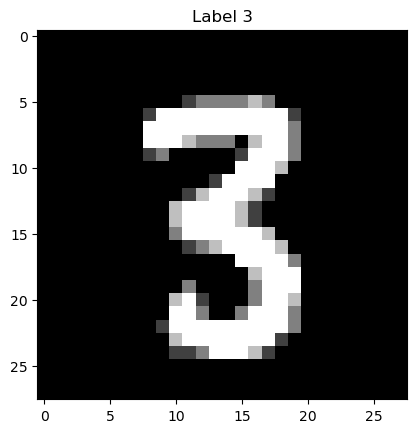

In [21]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

iterator = iter(train_loader)
images, labels = next(iterator)

plt.imshow(images[0][0], cmap="gray")
plt.title(f"Label {labels[0]}")
plt.show()

## Dataloaders for shuffling and creation of batches

In [13]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Visualizing one example

torch.Size([64, 1, 28, 28])


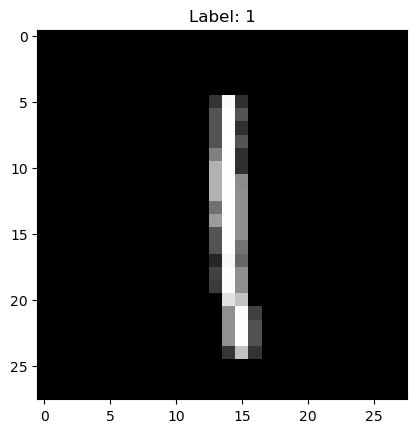

In [23]:
examples = iter(train_loader)
images, labels = next(examples)

print(images.shape)
plt.imshow(images[0][0], cmap="gray")
plt.title(f"Label: {labels[0]}")
plt.show()

## Creating the model

In [24]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Primera capa convolucional
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        # Segunda capa convolucional
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # Capa fully connected
        self.fc1 = nn.Linear(32*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        # Max pooling
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 + ReLU + Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 + ReLU + Pool
        x = x.view(-1, 32*7*7)               # Flatten
        x = F.relu(self.fc1(x))              # FC1 + ReLU
        x = self.fc2(x)                      # FC2 (salida)
        return x

# Instantiate the model

In [7]:
model = CNN()

# Define loss function

In [8]:
criterion = nn.CrossEntropyLoss()

# Define optimizer

In [9]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model

In [10]:
num_epochs = 5  # Number of times the entire dataset is processed

for epoch in range(num_epochs):
    running_loss = 0.0
    
    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass: compute predictions
        outputs = model(images)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass: compute gradients
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        # Accumulate loss for monitoring
        running_loss += loss.item()
    
    # Print average loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/5], Loss: 0.1937
Epoch [2/5], Loss: 0.0572
Epoch [3/5], Loss: 0.0387
Epoch [4/5], Loss: 0.0293
Epoch [5/5], Loss: 0.0223


# Evaluation metrics

In [11]:
model.eval()

with torch.no_grad():  # We don't need gradients for evaluation
    correct = 0
    total = 0
    
    for images, labels in test_loader:
        outputs = model(images)
        
        # Get predicted class (index of max score)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)         # Number of samples
        correct += (predicted == labels).sum().item()  # Count correct predictions


accuracy = 100 * correct / total
print(f"Accuracy on test set: {accuracy:.2f}%")

Accuracy on test set: 99.02%


## Visualization

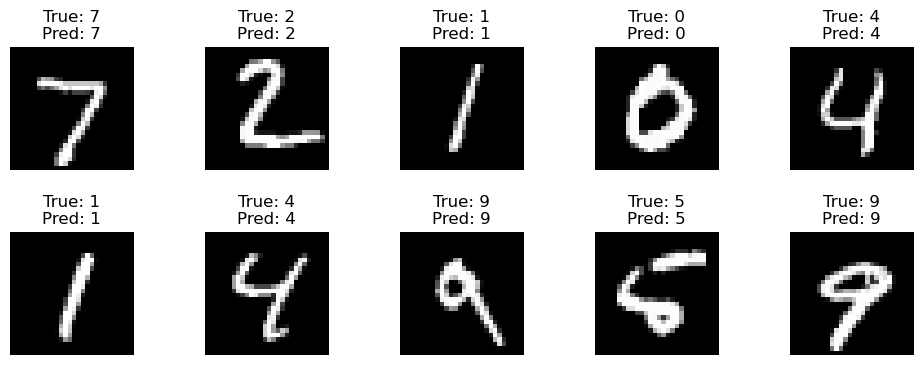

In [13]:
# Switch model to eval mode just in case
model.eval()

# Get a batch of test images
examples = iter(test_loader)
images, labels = next(examples)

# Make predictions
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Plot the first 10 images and their predicted labels
plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"True: {labels[i]}\nPred: {predicted[i]}")
    plt.axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()
